<a href="https://colab.research.google.com/github/lucscordeiro/Data-Projects-DIO/blob/main/Aula8_Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

<ipython-input-3-108091f10927>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
#upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [ ]:
df = pd.read_excel("/content/AdventureWorks.xlsx")

In [ ]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
df.shape

(904, 16)

In [ ]:
df.dtypes

,0
Data Venda,datetime64[ns]
Data Envio,datetime64[ns]
ID Loja,int64
ID Produto,int64
ID Cliente,int64
No. Venda,object
Custo Unitário,float64
Preço Unitário,float64
Quantidade,int64
Valor Desconto,float64


In [ ]:
#Qual a receita total?
df["Valor Venda"].sum()

5984606.1426

In [ ]:
#Qual o custo total?
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #criando coluna de custo

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [ ]:
#Qual o custo total?
round(df["custo"].sum(), 2) #round para arredondar em 2 casas decimais

2486783.05

In [ ]:
#Agora que temos a receita, o custo e o total, podemos achar o lucro total
#Vamos criar uma coluna de lucro que será Receita - Custo
df["Lucro"] = df["Valor Venda"] - df["custo"]

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [ ]:
#Total lucro
round(df["Lucro"].sum(), 2)

3497823.09

In [ ]:
#Criando coluna com total de dias para enviar o produto
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [ ]:
df.dtypes

,0
Data Venda,datetime64[ns]
Data Envio,datetime64[ns]
ID Loja,int64
ID Produto,int64
ID Cliente,int64
No. Venda,object
Custo Unitário,float64
Preço Unitário,float64
Quantidade,int64
Valor Desconto,float64


In [ ]:
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [ ]:
df["Tempo_envio"].dtypes

dtype('int64')

In [ ]:
#Media do tempo de envio por marcas
df.groupby("Marca")["Tempo_envio"].mean()

,Tempo_envio
Marca,
Adventure Works,8.663866
Contoso,8.470930
Fabrikam,8.510121


In [ ]:
#Verificando campos vazios
df.isnull().sum()

,0
Data Venda,0
Data Envio,0
ID Loja,0
ID Produto,0
ID Cliente,0
No. Venda,0
Custo Unitário,0
Preço Unitário,0
Quantidade,0
Valor Desconto,0


**Lucro por anor e por marca**

In [ ]:
#Agrupando ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format #Ajustando o formato dos numeros apos a virgula

In [ ]:
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [ ]:
#Qual o total de produtos vendidos?

df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

,Quantidade
Produto,
Headphone Adapter for Contoso Phone E130 Silver,25232
Headphone Adapter for Contoso Phone E130 White,25008
Adventure Works Laptop15.4W M1548 Black,1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
Adventure Works Laptop15.4W M1548 Red,1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


Text(0, 0.5, 'Produto')

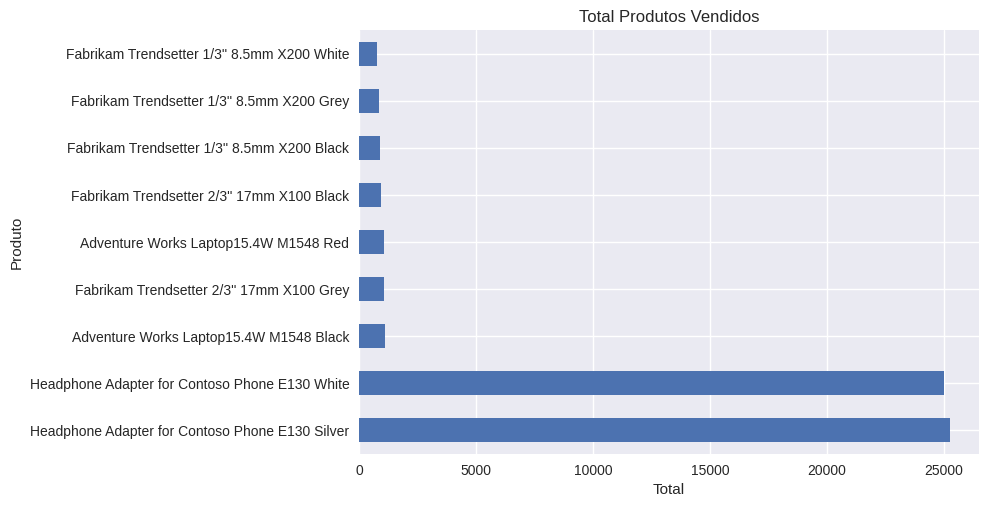

In [ ]:
#Grafico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")

Text(0, 0.5, 'Receita')

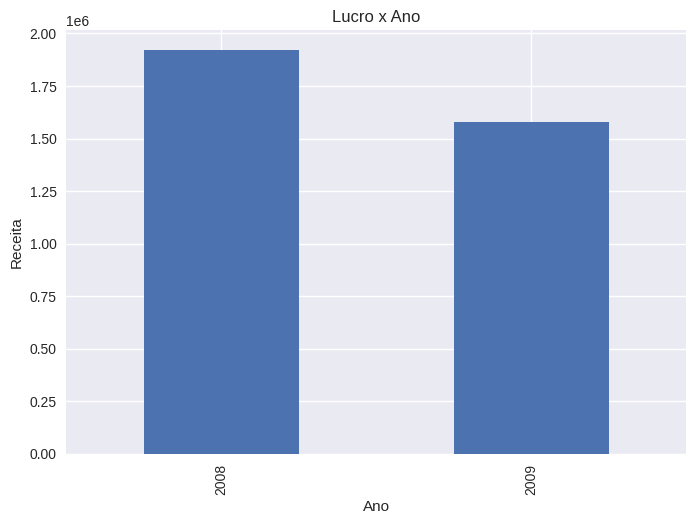

In [ ]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")

In [ ]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

,Lucro
Data Venda,
2008,"1,920,077.71"
2009,"1,577,745.38"


In [ ]:
#Selecionando apenas as vendas de 2019
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [ ]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


Text(0, 0.5, 'Lucro')

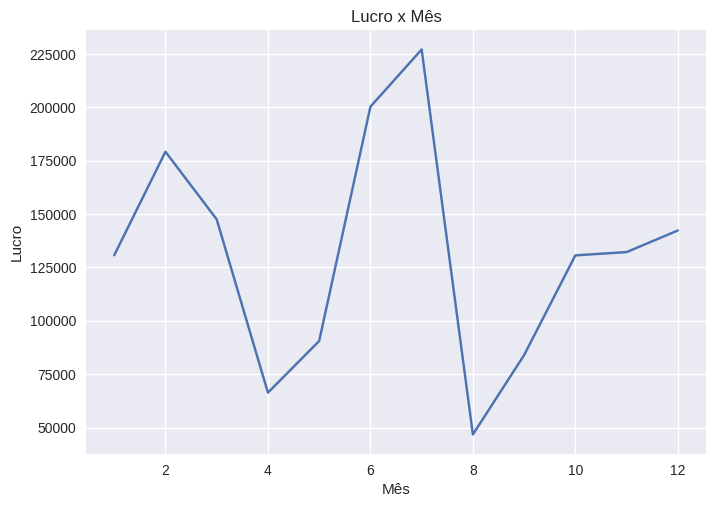

In [ ]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro")

(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

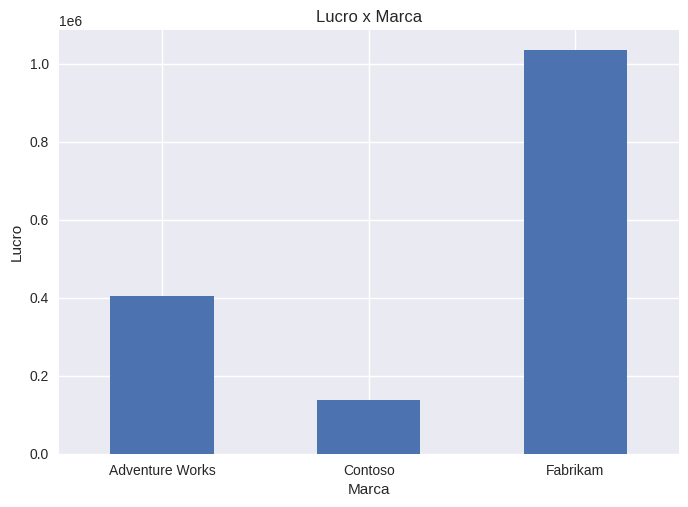

In [ ]:
df_2009.groupby(df["Marca"])["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal') #Ajusta o eixo x na horizontal (Para organizar os textos das barras)

(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

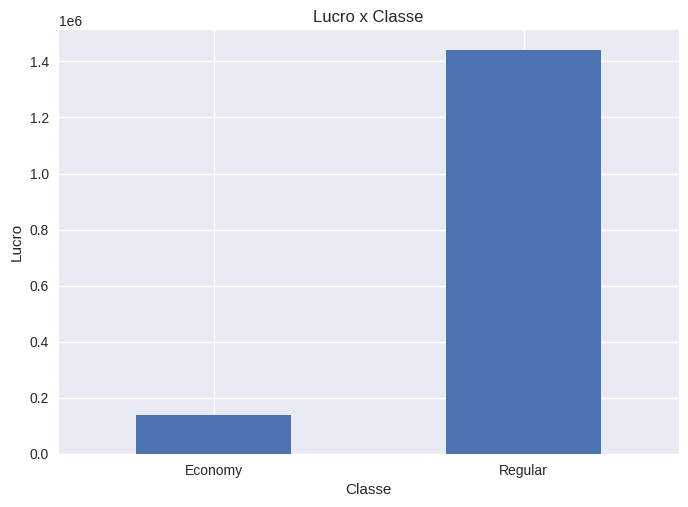

In [ ]:
df_2009.groupby(df["Classe"])["Lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal') #Ajusta o eixo x na horizontal (Para organizar os textos das barra

In [ ]:
df["Tempo_envio"].describe()

#Quantidade
#Media
#Desvio Padrao
#minimo
#Quartis 1/4 - 25%  2/4 - 50% 3/4 - 75%
#maximo

,Tempo_envio
count,904.00
mean,8.54
std,3.06
min,4.00
25%,6.00
50%,9.00
75%,11.00
max,20.00


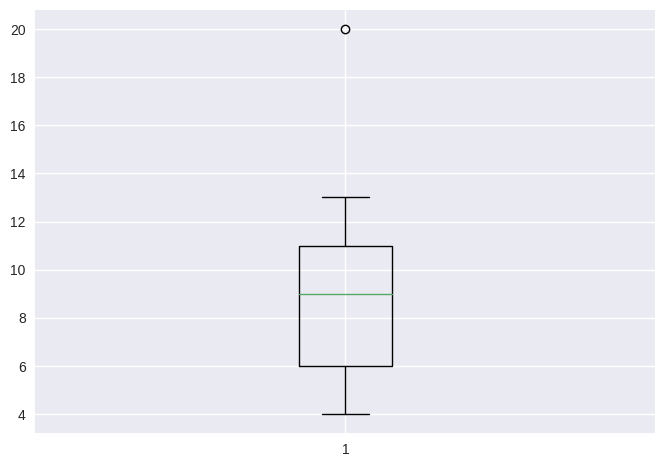

In [ ]:
plt.boxplot(df["Tempo_envio"]);

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <BarContainer object of 10 artists>)

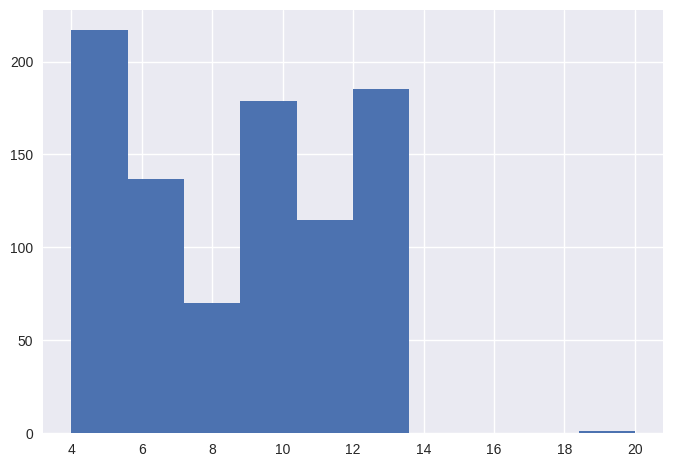

In [ ]:
plt.hist(df["Tempo_envio"])

In [ ]:
df["Tempo_envio"].min()

4

In [ ]:
df["Tempo_envio"].max()

20

In [ ]:
#Identificando o Outlier
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [ ]:
#salvando
df.to_csv("df_vendas_novo.csv", index=False)